# **Earthquake 6.0+ Magnitude**

# **0.0 Imports**

**0.1 Imports**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponnorm

**0.2 Helper Functions**

In [2]:
import io
from google.colab import files

# **1.0 Data Desscription**

**1.1 Loading Data**

In [3]:
uploaded = files.upload()

Saving Earthquake.csv to Earthquake.csv


In [20]:
df = pd.read_csv(io.BytesIO(uploaded['Earthquake.csv']))

In [21]:
df.head()

,time,Date,Time,latitude,longitude,depth,mag,magType,net,id,updated,place,type
0,1900-01-05T19:00:00.000Z,1/4/1900,7:00:00 PM,-3.0,102.0,0.0,7.0,ms,centennial,centennial19000105190000,2013-07-09T19:07:15.000Z,"southern Sumatra, Indonesia",earthquake
1,1900-01-11T09:07:00.000Z,1/10/1900,9:07:00 AM,-5.0,148.0,0.0,7.0,ms,centennial,centennial19000111090700,2013-07-09T19:07:15.000Z,Bismarck Sea,earthquake
2,1900-01-18T07:46:00.000Z,1/17/1900,7:46:00 AM,44.5,148.5,35.0,6.7,mj,centennial,centennial19000118074600,2013-07-09T19:07:15.000Z,Kuril Islands,earthquake
3,1900-01-20T06:33:00.000Z,1/19/1900,6:33:00 AM,20.0,-105.0,0.0,7.3,mw,centennial,centennial19000120063300,2013-07-09T19:07:15.000Z,"Jalisco, Mexico",earthquake
4,1900-01-31T19:22:00.000Z,1/30/1900,7:22:00 PM,48.0,146.0,450.0,7.5,mj,centennial,centennial19000131192200,2013-07-09T19:07:15.000Z,northwest of the Kuril Islands,earthquake


In [22]:
df.tail()

,time,Date,Time,latitude,longitude,depth,mag,magType,net,id,updated,place,type
8308,2014-03-13T17:06:50.800Z,3/13/2014,5:06:50 PM,33.6793,131.8197,79.0,6.3,mwb,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake
8309,2014-03-15T08:59:21.790Z,3/15/2014,8:59:21 AM,-14.0935,-76.2968,20.0,6.1,mww,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake
8310,2014-03-15T23:51:30.610Z,3/15/2014,11:51:30 PM,-5.5660,-80.8790,9.8,6.3,mwp,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake
8311,2014-03-16T21:16:30.770Z,3/16/2014,9:16:30 PM,-19.9246,-70.6278,20.0,6.7,mww,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake
8312,2014-03-17T05:11:34.980Z,3/17/2014,5:11:34 AM,-20.0030,-70.8741,17.0,6.2,mww,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake


**1.2 Column Description**


*   ***time:*** gives time of incident
*   ***date:*** gives date of incident


*   ***Latitude:*** gives latitude coordinates
*   ***Longitude:*** gives longitude coordinates


*   ***depth:*** gives depth at which earthquake occured
*   ***mag:*** gives the magnitude of earthquake


*   ***id:*** gives the official ID number for earthquake
*   ***place:*** gives the location of earthquake









**1.3 Data Types and Structure**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8313 entries, 0 to 8312
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       8313 non-null   object 
 1   Date       8313 non-null   object 
 2   Time       8313 non-null   object 
 3   latitude   8313 non-null   float64
 4   longitude  8313 non-null   float64
 5   depth      8313 non-null   float64
 6   mag        8312 non-null   float64
 7   magType    8298 non-null   object 
 8   net        8313 non-null   object 
 9   id         8313 non-null   object 
 10  updated    8313 non-null   object 
 11  place      8304 non-null   object 
 12  type       8313 non-null   object 
dtypes: float64(4), object(9)
memory usage: 844.4+ KB


**1.4 Change Data Type**

In [24]:
df['time']=df['time'].apply(pd.to_datetime)

# **2.0 Feature Engineering**

In [25]:
df['time_gap']=df['time'].diff()
df['time_gap']=df['time_gap'].dt.total_seconds()/3600

**2.1 Visualizing PDF of Variable**

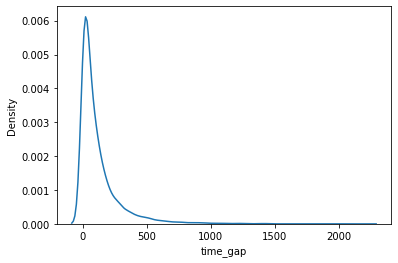

In [26]:
sns.kdeplot(df['time_gap'])

# **3.0 Selecting Column**

In [27]:
x=df['time_gap'].sample(1000)

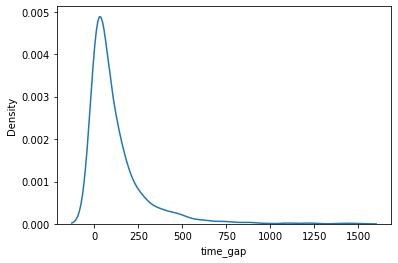

In [28]:
sns.kdeplot(x)

# **4.0 Fit Statistical Model**

**4.1 Beta Distribution**

In [29]:
from scipy.stats import beta

In [30]:
a,b,loc,scale=beta.fit(x)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [31]:
sample=np.array([i for i in range(0,2207)])
sample

array([   0,    1,    2, ..., 2204, 2205, 2206])

In [32]:
pdf=beta.pdf(sample,a,b,loc,scale)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


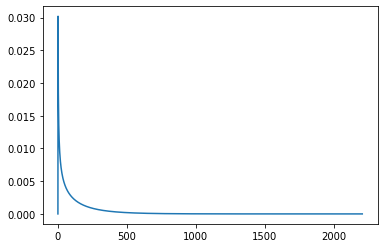

In [33]:
sns.lineplot(sample,pdf)

**4.2 Visually Comparing the Distribution Fit**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


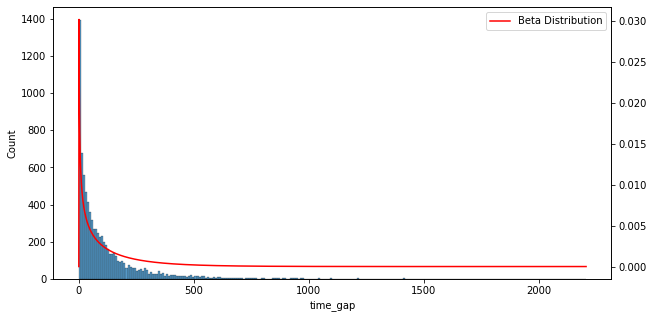

In [47]:
fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
sns.histplot(df['time_gap'],bins=250,ax=ax1)
sns.lineplot(sample,pdf,ax=ax2,label='Beta Distribution',color='r')
plt.legend()
plt.show()